In [6]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import util
from test_to_bw_fast import read_model
import metrics
import wandb
from test_to_bw_fast import get_config
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from test_to_bw_fast import open_bw
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error 
from tqdm import tqdm
from scipy.spatial import distance
from scipy import stats
import pickle, os
from scipy.stats import pearsonr, spearmanr
import metrics 
import tfr_evaluate 

In [2]:
# piv_loss_df.set_index('loss_fn', inplace=True)
# plt.figure(figsize=[10,5])
# sns.heatmap(piv_loss_df, annot=True, linewidths=.5)

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# new finetune bin loss experiment

In [5]:
summary_performance = pd.read_csv('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/binloss_basenji.csv')


average_summary_performance = summary_performance[(summary_performance['pred type'] == 'scaled')&
                                                  (summary_performance['eval type'] == 'whole')
                                                  ].groupby(['bin_size', 'loss_fn']).mean().reset_index()

loss_name_subs = {'basenjipearsonr': 'pearson r', 'mse': 'MSE',
                  'multinomialnll_mse_reg':'multinomial NLL + MSE',
                 'poisson':'poisson NLL', 'pearsonr_mse': 'pearson r + MSE'}

average_summary_performance['loss'] = [loss_name_subs[l] for l in average_summary_performance['loss_fn'].values]

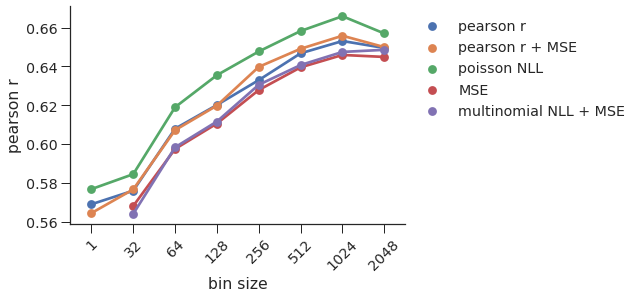

In [85]:
sns.set(font_scale=1.3)  # crazy big
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
sns.pointplot(data=average_summary_performance, x='bin_size', y='pr_corr', hue='loss')
plt.xticks(rotation=45);
plt.legend(frameon=False, bbox_to_anchor=(1,1))
plt.xlabel('bin size')
plt.ylabel('pearson r')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.tight_layout()
# plt.savefig('plots/bin_loss_basenji.svg', bbox_inches="tight")

(1.12, 1.75)

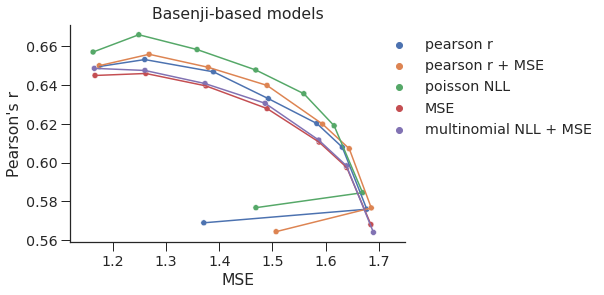

In [10]:
sns.set(font_scale=1.3)  # crazy big
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True


df = average_summary_performance
lines = sns.lineplot(data=df.sort_values('bin_size'), x='mse', 
                     y='pr_corr', hue='loss', sort=False, legend=False)

points = sns.scatterplot(data=average_summary_performance, x='mse', y='pr_corr', hue='loss', 
                         ax=lines, legend='full')

points.legend(frameon=False, bbox_to_anchor=(0.9,1))
plt.title('Basenji-based models')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Pearson\'s r')
plt.xlabel('MSE')
plt.xlim(1.12,1.75)



In [87]:
replicate_performance = pd.read_csv('results_tfr_evaluate/12_replicates.csv')
avg_repl_performance = (replicate_performance[replicate_performance['eval_type']=='whole']).groupby(['eval_bin_size']).mean().reset_index()
temp_col_rename = {'eval_bin_size': 'bin_size', 'pr_corr': 'pr'}
avg_repl_performance = avg_repl_performance.rename(columns=temp_col_rename)
avg_repl_performance['loss'] = 'replicates'

In [88]:
# metrics_only = average_summary_performance[['mse', 'js_conc', 'poiss', 'pr']]

In [21]:
binloss_and_repl_perf = pd.concat([average_summary_performance, avg_repl_performance])[['bin_size', 'loss', 'mse', 'pr_corr']]

In [171]:
type(0.02)

float

In [196]:
def label_point(x, y, val, ax, x_add, y_add):

    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for e, (i, point) in enumerate(a.iterrows()):
        ax.text(point['x']+x_add[e], point['y']+y_add[e], str(int(point['val'])), fontsize=8)

(1.12, 1.75)

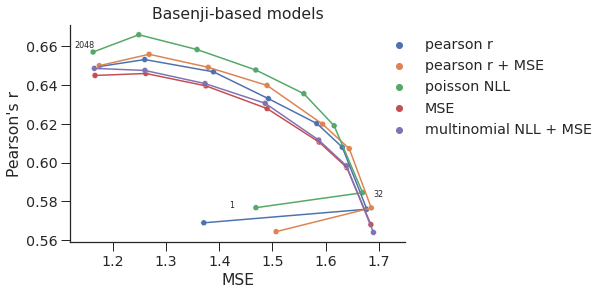

In [208]:
sns.set(font_scale=1.3)  # crazy big
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
# s_correlation = spearmanr(average_summary_performance['mse'], average_summary_performance['pr'])[0]
# p_correlation = pearsonr(average_summary_performance['mse'], average_summary_performance['pr'])[0]
no_baseres = average_summary_performance[average_summary_performance['bin_size']!=1]
# nopearsonrloss = average_summary_performance[average_summary_performance['loss']!='pearson r']
df = average_summary_performance
lines = sns.lineplot(data=df.sort_values('bin_size'), x='mse', 
                     y='pr_corr', hue='loss', sort=False, legend=False)



points = sns.scatterplot(data=average_summary_performance, x='mse', y='pr_corr', hue='loss', 
                         ax=lines, legend='full',
#                          palette=['green','orange','brown','dodgerblue','red', 'purple', 'cyan', 'magenta']
                         #, colors = ['red', 'blue', 'green', 'black', 'purple', 'yellow', 'cyan', 'magenta']
                        )


# points = lines.scatter(df['mse'], df['pr_corr'], c=df['bin_size'], cmap="tab20c", label=df['bin_size']
#                          #legend='full'#, colors = ['red', 'blue', 'green', 'black', 'purple', 'yellow', 'cyan', 'magenta']
#                         )

# points.legend()
# plt.text(1.6,0.66,'spearman r = {:.2f}\npearson r = {:.2f}'.format(s_correlation, p_correlation))
# lines.get_legend().remove()
points.legend(frameon=False, bbox_to_anchor=(0.9,1))
plt.title('Basenji-based models')
# sns.set(font_scale=0.8)  # crazy big

points_to_label = df[((df['bin_size']==1) |(df['bin_size']==32)| (df['bin_size']==2048))&(df['loss']=='poisson NLL')]
label_point(points_to_label['mse'], points_to_label['pr_corr'], 
            points_to_label['bin_size'], points, [-0.05, 0.02, -0.035], [0,-0.002,0.002])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Pearson\'s r')
plt.xlabel('MSE')
plt.xlim(1.12,1.75)


In [179]:
points_to_label

,bin_size,loss_fn,index,mse,js_per_seq,js_conc,poiss,pr_corr,sp_corr,l_rate,num_epochs,window_size,loss
2,1,poisson,7,1.469005,0.169881,0.228024,0.341187,0.576753,0.473844,0.001,100,2048,poisson NLL
7,32,poisson,7,1.669713,0.164144,0.224140,0.418741,0.584464,0.481458,0.001,100,2048,poisson NLL
37,2048,poisson,7,1.162563,0.000000,0.167816,0.437560,0.656958,0.588237,0.001,100,2048,poisson NLL


In [174]:
len(points_to_label[points_to_label['loss']=='poisson NLL'])

3

# BPNet bin loss exp

In [90]:
summary_files = ['/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/ADDED_bin_loss_40.csv',
                '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/bin_loss_40.csv']

summary_performance = pd.concat([pd.read_csv(f) for f in summary_files])





In [109]:
average_summary_performance = summary_performance[(summary_performance['pred type'] == 'scaled')&
                                                  (summary_performance['eval type'] == 'idr')
                                                  ].groupby(['bin_size', 'loss_fn']).mean().reset_index()
average_summary_performance.shape

(40, 12)

In [110]:
loss_name_subs = {'basenjipearsonr': 'pearson r', 'mse': 'MSE',
                  'multinomialnll_mse_reg':'multinomial NLL + MSE',
                 'poisson':'poisson NLL', 'pearsonr_mse': 'pearson r + MSE'}

average_summary_performance['loss'] = [loss_name_subs[l] for l in average_summary_performance['loss_fn'].values]

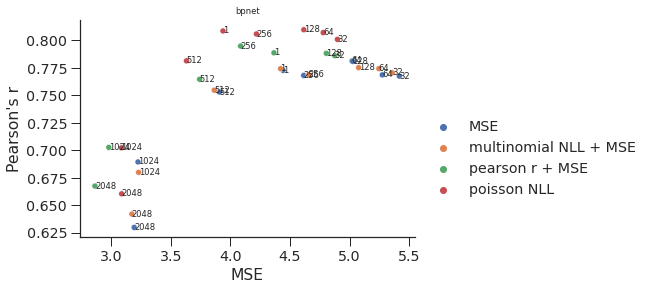

In [113]:
sns.set(font_scale=1.3)  # crazy big
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
# s_correlation = spearmanr(average_summary_performance['mse'], average_summary_performance['pr'])[0]
# p_correlation = pearsonr(average_summary_performance['mse'], average_summary_performance['pr'])[0]
# no_baseres = average_summary_performance[average_summary_performance['bin_size']!=1]
nopearsonrloss = average_summary_performance[average_summary_performance['loss']!='pearson r']

df = nopearsonrloss
# lines = sns.lineplot(data=nopearsonrloss, x='mse', y='pr_corr', hue='loss')



points = sns.scatterplot(data=df, x='mse', y='pr_corr', hue='loss') #ax=lines, , legend=False



# plt.text(1.6,0.66,'spearman r = {:.2f}\npearson r = {:.2f}'.format(s_correlation, p_correlation))
# lines.get_legend().remove()
points.legend(frameon=False, bbox_to_anchor=(1.7,0.6))

sns.set(font_scale=0.7)
label_point(df['mse'], df['pr_corr'], df['bin_size'], points)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Pearson\'s r')
plt.xlabel('MSE')
plt.title('bpnet');

In [41]:
nopearsonrloss

,bin_size,loss_fn,index,mse,js_per_seq,js_conc,poiss,pr_corr,sp_corr,l_rate,num_epochs,window_size,loss
1,1,mse,7,0.875251,0.341747,0.381656,NaN,0.552559,0.409212,0.001,100,2048,MSE
2,1,multinomialnll_mse_reg,7,0.861129,0.341848,0.379911,NaN,0.557117,0.416286,0.001,100,2048,multinomial NLL + MSE
3,1,pearsonr_mse,7,0.966148,0.367019,0.389443,NaN,0.570924,0.433774,0.001,100,2048,pearson r + MSE
4,1,poisson,7,0.750164,0.334996,0.365291,0.814502,0.600829,0.474063,0.001,100,2048,poisson NLL
6,32,mse,7,0.864504,0.329371,0.372891,NaN,0.549765,0.423763,0.001,100,2048,MSE
7,32,multinomialnll_mse_reg,7,0.859899,0.329949,0.374226,NaN,0.548920,0.416392,0.001,100,2048,multinomial NLL + MSE
8,32,pearsonr_mse,7,0.914344,0.339419,0.374728,NaN,0.566976,0.437406,0.001,100,2048,pearson r + MSE
9,32,poisson,7,0.799449,0.321459,0.361087,0.821851,0.583022,0.474010,0.001,100,2048,poisson NLL
11,64,mse,7,0.838633,0.319846,0.367938,NaN,0.550392,0.417304,0.001,100,2048,MSE
12,64,multinomialnll_mse_reg,7,0.830731,0.318024,0.365677,NaN,0.555484,0.426417,0.001,100,2048,multinomial NLL + MSE


# weird 3 points

In [24]:
average_summary_performance[(average_summary_performance['mse']>1.3)&
(average_summary_performance['mse']<1.6)&
(average_summary_performance['pr_corr']<0.6)]

,bin_size,loss_fn,index,mse,js_per_seq,js_conc,poiss,pr_corr,sp_corr,l_rate,num_epochs,window_size,loss
0,1,basenjipearsonr,7,1.370937,0.170731,0.216082,0.317168,0.568953,0.464149,0.001,100,2048,pearson r
1,1,pearsonr_mse,7,1.506963,0.195851,0.242553,0.351620,0.564400,0.462715,0.001,100,2048,pearson r + MSE
2,1,poisson,7,1.469005,0.169881,0.228024,0.341187,0.576753,0.473844,0.001,100,2048,poisson NLL


In [28]:
testset, targets, target_dataset_idr = tfr_evaluate.collect_datasets()

In [25]:
# for run_dir in collect_run_dirs('BASENJI_BIN_LOSS'):
#     metadata = get_run_metadata(run_dir)
#     if (128, 'poisson') == (metadata['bin_size'].values[0], metadata['loss_fn'].values[0]):
#         run_128_poiss = run_dir
bin_size = 128
run_128_poiss = np.unique(summary_performance[(summary_performance['bin_size']==bin_size) 
                                              & (summary_performance['loss_fn']=='poisson')]['run_dir'])[0]

In [26]:
model, bin_size = tfr_evaluate.read_model(run_128_poiss)

In [29]:
ground_truth, predictions = tfr_evaluate.get_true_pred(model, bin_size, testset)

# sanity check if all cell lines behave the same

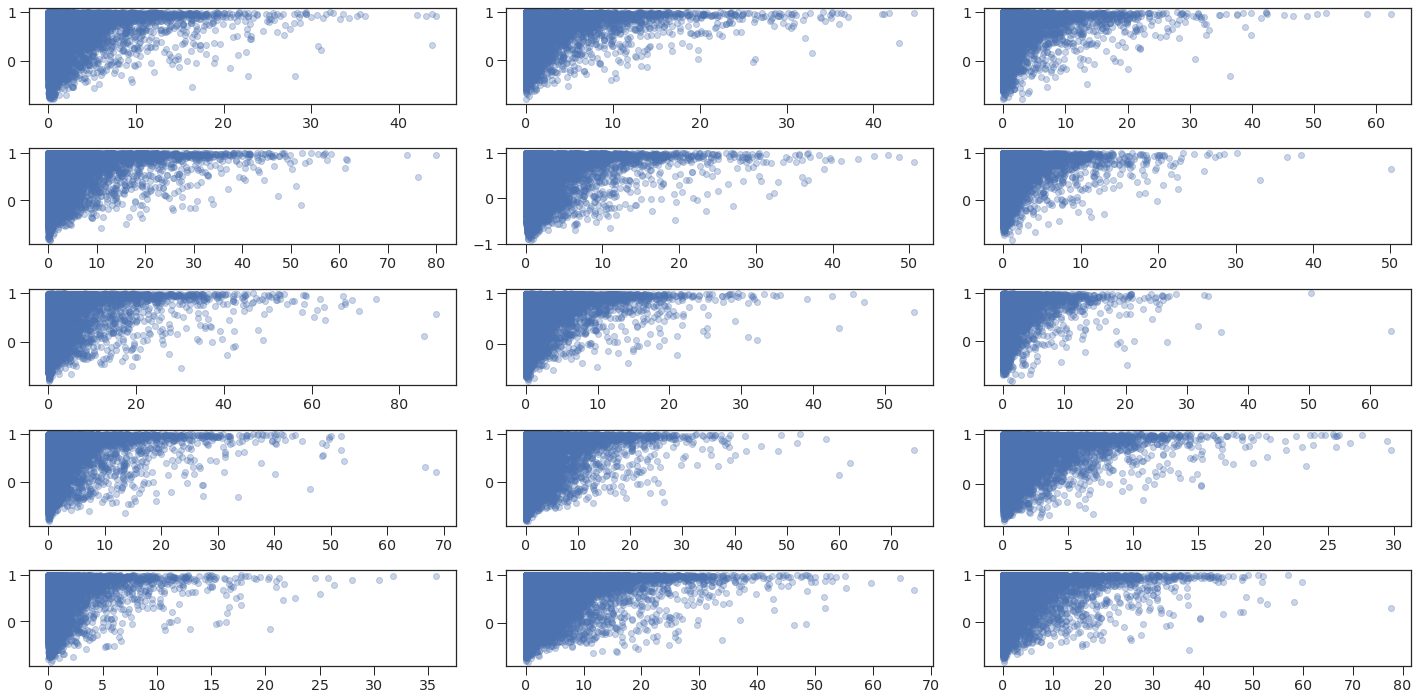

In [117]:
pr_per_seq = get_pearsonr_per_seq(ground_truth, predictions, take_avg=False)
mse_per_seq = get_mse(ground_truth, predictions)
nrows, ncols = 5, 3
fig = plt.figure(figsize=[20,10])    

for i in range(15):
    ax = fig.add_subplot(nrows, ncols, i+1)
    pr_per_seq_per_cell = pr_per_seq[i]
    mse_per_seq_per_cell = mse_per_seq[:,:,i].mean(axis=1)
    both_metrics_per_cell = np.array([mse_per_seq_per_cell, pr_per_seq_per_cell]).T
    no_nan_metrics_per_cell = both_metrics_per_cell[~np.isnan(both_metrics_per_cell).any(axis=1)]
    metrics_clean_per_cell = pd.DataFrame(no_nan_metrics_per_cell, columns=['MSE', 'pearson r'])
    ax.scatter(metrics_clean_per_cell['MSE'], metrics_clean_per_cell['pearson r'], alpha=0.3)
fig.tight_layout()

# scatterplot one cell line

In [32]:
CELL_LINE = 8
cell_line_specific_idr = target_dataset_idr[(CELL_LINE, targets[CELL_LINE])]


In [38]:
ground_truth, predictions = tfr_evaluate.get_true_pred(model, bin_size, cell_line_specific_idr)

In [43]:
mse_per_seq.shape


(7065, 16, 1)

In [41]:
predictions = np.expand_dims(predictions[:,:,CELL_LINE], axis=-1)

In [44]:
pr_per_seq = metrics.get_correlation_per_seq(ground_truth, 
                                  predictions, take_avg=False)[0]
mse_per_seq = np.squeeze(metrics.get_mse(ground_truth, predictions)).sum(axis=1)
both_metrics = np.array([mse_per_seq, pr_per_seq]).T
no_nan_metrics = both_metrics[~np.isnan(both_metrics).any(axis=1)]
metrics_clean = pd.DataFrame(no_nan_metrics, columns=['MSE', 'pearson r'])

/home/shush/tf_2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


Cell line = A549
Spearman's rho = 0.29
Pearson's r = 0.11


(-2.0, 30.0)

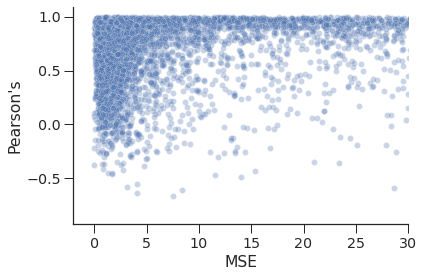

In [46]:
sns.set(font_scale=1.3)  # crazy big
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

x = metrics_clean['MSE']
y = metrics_clean['pearson r']

sns.scatterplot(x, y, alpha=0.3)

s_correlation = spearmanr(x, y)[0]
p_correlation = pearsonr(x, y)[0]

print('Cell line = '+targets[CELL_LINE])
print('Spearman\'s rho = {:.2f}\nPearson\'s r = {:.2f}'.format(s_correlation, p_correlation))

plt.legend(frameon=False, bbox_to_anchor=(1,0.8))


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Pearson\'s');
plt.xlabel('MSE');
plt.xlim(-2,30)